# Identify Fraud from Enron Email

## Mylu Praveen



1) Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]


In this Project our goal is to identify the person committing fraud in Enron or to find out the person of intrest(used by US law for identifying person committed crimes).
Machine learning techniques helps us to identify the person involving in fraud.


Data Exploration:

a) Total number of data points = 146

b) Number of features = 21

Size of each feature = 146

Total Count of values = Count of non missing values + Count of missing values

   b1) bonus: 82 + 64
   
   b2) deferral_payments: 39 + 107
   
   b3) deferred_income: 49 + 97
   
   b4) director_fees: 17 + 129
   
   b5) email_address: 111 + 35
   
   b6) exercised_stock_options: 102 + 44
   
   b7) expenses: 95 + 51
   
   b8) from_messages: 86 + 60
   
   b9) from_poi_to_this_person: 86 + 60
   
   b10) from_this_person_to_poi: 86 + 60
   
   b11) loan_advances: 4 +  142
   
   b12) long_term_incentive: 66 + 80
   
   b13) other: 93 + 53
   
   b14) poi: 146 + 0
   
   b15) restricted_stock: 110 + 36
   
   b16) restricted_stock_deferred: 18 + 128
   
   b17) salary:  95 + 51
   
   b18) shared_receipt_with_poi: 86 + 60
   
   b19) to_messages: 86 + 60
   
   b20) total_payments: 125 + 21
   
   b21) total_stock_value: 126 + 20
 
We can observe  that there are no missing values for POI
   
c) Non-POI = 128

d) POI = 18

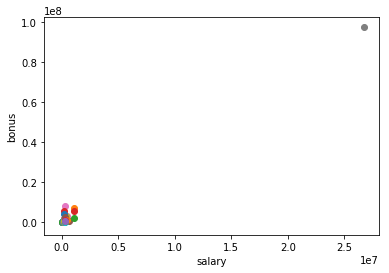

None


In [7]:
import matplotlib.pyplot
def Outliers(my_dataset, feature_x, feature_y):
    
    data = featureFormat(my_dataset, [feature_x, feature_y])
    for point in data:
        x = point[0]
        y = point[1]
        matplotlib.pyplot.scatter( x, y )
    matplotlib.pyplot.xlabel(feature_x)
    matplotlib.pyplot.ylabel(feature_y)
    matplotlib.pyplot.show()

print(Outliers(data_dict, 'salary', 'bonus'))
identity = []

Outlier Investigation:

By this scatter plot for salary vs bonus we can identify an outlier named "TOTAL" which will be removed. "THE TRAVEL AGENCY IN THE PARK" also need to be removed because it is an travel agency. We remove "LOCKHART EUGENE E" which dont have any value other than NaN.


2) What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset — explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importance of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.

I have created two new features as (fraction_from_poi) and (fraction_to_poi).
fraction_from_poi states that the number of emails received from POIs and fraction_to_poi states that the number of emails sent to POIs. By creating this features we may get to know the person sending and receiving email with POIs might be POI himself. We can think of a logic that mostly POIs will be much in contact with each other than with Non-POIs, where it would be helpful to improve classifier's performance.

An automated feature selection function SelectKBest with k =7 is used for identifying features.
There are totally 23 features in the dataset in which no all features need to be used. I have choosen k = 7 to obtain 7 highest scoring features where remaining features were to be removed based on the k scores using SelectKBest univariate statistical tests. We randomly divide the Dataset into a training dataset with 70% and a testing dataset with 30%.

I tried testing the classifier with some values of k and got accuracy, precision and recall as:

k = 7 : Accuracy = 0.84671 , Precision = 0.45660 , Recall = 0.38400  

k = 8 : Accuracy = 0.84100, Precision = 0.38355 , Recall = 0.31700  

k = 9 : Accuracy = 0.83613, Precision = 0.36639, Recall = 0.31400  

k = 15 : Accuracy = 0.81353, Precision = 0.30437, Recall = 0.31000 

k = 20 : Accuracy = 0.77020, Precision = 0.21392, Recall = 0.27050 

k = 22 : Accuracy = 0.77320, Precision = 0.21870, Recall = 0.27250 

We get better accuracy, precision and recall for k = 7 as much better compared to remaining values for obtaining k scores. so i choosed the value as k = 7.

total number of features are 28

K Scores for the features are

a) exercised_stock_options = 24.815079733218194)

b) total_stock_value = 24.182898678566879)

c) bonus = 20.792252047181535)

d) salary = 18.289684043404513)

e) deferred_income = 11.458476579280369)

f) long_term_incentive = 9.9221860131898225)

g) restricted_stock = 9.2128106219771002)

h) total_payments = 8.7727777300916756)

i) shared_receipt_with_poi = 8.589420731682381)

j) loan_advances = 7.1840556582887247)

k) expenses = 6.0941733106389453)

l) from_poi_to_this_person = 5.2434497133749582)

m) fraction_from_poi = 5.1239461527568926)

n) other = 4.1874775069953749)

o) fraction_to_poi = 4.0946533095769526)

p) from_this_person_to_poi = 2.3826121082276739)

q) director_fees = 2.1263278020077054)

r) to_messages = 1.6463411294420076)

s) bonus_salary_ratio = 0.62853011823446625)

t) deferral_payments = 0.22461127473600989)

u) from_messages = 0.16970094762175533)

v) total_net_worth = 0.085619908360810876)

w) restricted_stock_deferred = 0.065499652909942141)

features list = ['poi', 'salary', 'bonus', 'deferred_income', 'total_stock_value', 'exercised_stock_options', 'long_term_incentive', 'restricted_stock']

exercised_stock_options and total_stock_value are the most highest K scores compared to all the features.

All these features were rescaled using the sklearn min/max scaler where as the email data points and feature data points are measured by different scales. k-nearest neighbors with an Euclidean distance measure, where features will contribute equally.








3) What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? [relevant rubric item: “pick an algorithm”]


I have used mulitple algorithms such as:

a) Gaussian NB:

   Accuracy = 0.84671

   Precision = 0.45660

   Recall = 0.38400 

   F1 = 0.41716     

   F2 = 0.39661

   Total predictions = 14000        

   True positives = 768    

   False positives = 914   

   False negatives = 1232   

   True negatives = 11086


b) Linear SVC:

   Accuracy = 0.66193
   
   Precision = 0.13374
   
   Recall = 0.24950
   
   F1 = 0.17414
   
   F2 = 0.21268
   
   Total predictions = 14000
   
   True positives = 499
   
   False positives = 3232
   
   False negatives = 1501
   
   True negatives = 8768


c) DecissionTreeclassifier:
   
   Accuracy = 0.78650
   
   Precision = 0.24758
   
   Recall = 0.24250
   
   F1 = 0.24501
   
   F2 = 0.24350
   
   Total predictions = 14000
   
   True positives =  485
   
   False positives = 1474
   
   False negatives = 1515
   
   True negatives = 10526


d) KNeighborsClassifier:

   Accuracy = 0.87650
   
   Precision = 0.68385
   
   Recall = 0.25200
   
   F1 = 0.36829
   
   F2 = 0.28843
   
   Total predictions = 14000
   
   True positives =  504
   
   False positives =  233
   
   False negatives = 1496
   
   True negatives = 11767
   
   
Compared to all algorithms or classifiers Gaussian NB has a good accuracy, precision and recall scores where KNeighborsClassifier also have an good accuracy and precision but low recall than Gaussain NB. DecisionTreeClassifier and Linear SVC tends to have low accuracy, precision and recall scores compared to Gaussian NB and KNeighborsClassifier.

To standardize the range we use a method called feature scaling. It was performed for both KNeighbors and Linear SVC.




4) What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune — if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).


Tuning parameter is used in statistics algorithm in order to control their behaviour. The algorithm creates normally for each value of the tuning parameter a different model.  It also helps to improve performanced. 

If we are not performing this tuning parameter then we may not able to get better perfomance for the algorithm.

I have used multiple algorithms and used GridSearchCV function to get the best parameters and F1 is used as the scoring method. Algorithms used are:

a) GaussianNB

b) Linear SVC

c) DecisionTreeClassifier

d) KNeighborsClassifier



Accuracy =  0.93023255814

Precision = 0.4

Recall = 1.0




5) What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?


In machine learning, validation is the process where a trained model is evaluated with a testing data set. It is the process of testing our algorithm performance by splitting the dataset into separate training and test data. 
Our idea is to test the model in the training phase.

we separate data in three parts as training, cross-validation and test sets. so model is tuned to maximize the evaluation score on the cross-validation set, and then the finally model efficiency will be measured on the test set.

Since there are too few observations for us to train and test the algorithms, in order to extract the most information from the data, the selected strategy to validate our model was a Nested Stratified Shuffle Split Cross-Validation.

The tester.py script is used to measure the results for each of the iteration. Stratified ShuffleSplit cross-validator is used which provides training and testing indices to split data in train and test sets.

The tester.py script uses number of iterations of the StratifiedShuffleSplit. Iteration StratifiedShuffleSplit will be added to the poi_id.py script in order to validate faster.

we prefer smaller data for training part, where using whole data we cant train it. Train test split will be used to validate the performance. We split the data into training data and test data and calculate the accuracy, precision, and recall for each of the iteration.
A single split into a training & testing set wont give a better estimate of error accuracy, so the data need to be randomly splitted into k folds. BY this validator we can independently choose how large each test set is and how many trials you average over. 

Validation in machine learning consists of evaluating a model using data that was not touched during the training process. A classic mistake is to ignore this rule, hence obtaining overly optimistic results due to overfitting the training data, but very poor performance on unseen data.





6) Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.


Precision and Recall are the two evaluation metrics used and Naive bayes is the best algorithm that can match in this project. 

KNeighborsClassifier have an good accuracy and precision but it has a low recall score compared to Gaussain NB. so we prefer Gaussian NB as the best algorithm as it has an  Accuracy: 0.84671, Precision: 0.45660 and Recall: 0.38400.

DecisionTreeClassifier and Linear SVC tends to have low precision and recall scores compared to Gaussian NB and KNeighborsClassifier. where as KneighborClassifier has true positives of 504 and false positives of 233.

Precision is the ratio of right classifications over all observations with a given predicted label. For example, the ratio of true POI’s over all predicted POI’s.

Recall is the ratio of right classifications over all observations that are truly of a given class. For example, the ratio of observations correctly labeled POI over all true POI’s.

Finally for the selected model GuassianNB we get our scores as:

Accuracy = 0.84671       

Precision = 0.45660

Recall = 0.38400
